In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

What variables are the most positively correlated with multi-year APR, and can we accurately predict what a teams multi-year APR will be given other data? (regression). This will involve using linear regression on the whole dataset to determine which variables are significant.

There are a couple of reasons why this is an important question to answer. One being that if the NCAA can predict what teams will have a higher or lower APR it knows which schools and sports it can provide athletes with more resources to help the students. Additionally if the NCAA knows which factors are most important for predicting APR they can know exactly how to help their athletes



In [4]:
data=pd.read_csv('C:/Users/natha/OneDrive/Documents/GitHub/DIDA_325_Final-project/csvs/cleaned_data2.csv')

In [5]:
x_columns=['SCL_HBCU', 'SCL_PRIVATE', 'MULTIYR_SQUAD_SIZE', 'SCL_SUB_19', 'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE'] # these are all the columns that will be used as predictive variables
X=data[x_columns] 
X = pd.get_dummies(X, drop_first=True).astype("float32") #For SCL_HCU and SCL_PRIVATE, we need to convert them to numeric values. We use get_dummies to convert them to binary variables. .
y=data['MULTIYR_APR_RATE_1000_OFFICIAL'] #This is our response variable, the APR for each team
X = sm.tools.tools.add_constant(X) #Add a constant to the model. This is necessary for the OLS regression model.
model=sm.OLS(y, X).fit() 
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     MULTIYR_APR_RATE_1000_OFFICIAL   R-squared:                       0.896
Model:                                        OLS   Adj. R-squared:                  0.896
Method:                             Least Squares   F-statistic:                     8643.
Date:                            Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                                    13:49:37   Log-Likelihood:                -18418.
No. Observations:                            6002   AIC:                         3.685e+04
Df Residuals:                                5995   BIC:                         3.690e+04
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---

From the model summary we can see that "MULTIYR_SQUAD_SIZE", "MULTIYR_ELIG_RATE", "MULTIYR_RET_RATE", and "SCL_HCBU_Y" are all signifiicant variables as their p-values round to zero and using the coefficients we can gleam the following
MULTIYR_SQUAD_SIZE:
Every additional 1 person added to the squad size decreases the APR score by 0.0156 points, on average, holding other variables constant.
MULTIYR_ELIG_RATE:
Every 1.0 (or 100 percentage points) increase in eligibility rate would increase APR by 424.32 points. More realistically, a 1% increase (i.e., +0.01) in eligibility rate would increase APR by about 4.24 points.
MULTIYR_RET_RAT:
Every 1.0 (or 100 percentage points) increase in retention rate would increase APR by 420.22 points. So a 1% increase (i.e., +0.01) in retention rate would increase APR by about 4.20 points.
SCL_HBCU_Y:
If a school is an HBCU (coded as 1), then the APR is higher by about 1.92 points compared to non-HBCUs (coded as 0), holding everything else constant.

Text(0, 0.5, 'Residual')

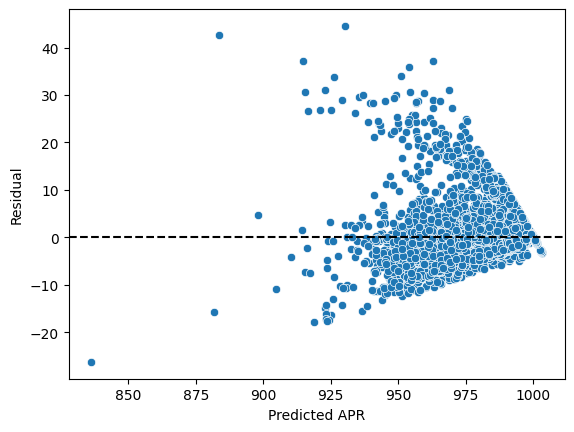

In [ ]:
yhat = model.predict()
residuals = y - yhat
ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Predicted APR")
plt.ylabel("Residual")

There do not seem to be any trends with the residuals, which is a good thing for our model.